<a href="https://colab.research.google.com/github/JapiKredi/Google_Gemma_LLM_Finetuning/blob/main/Google_Gemma_LLM_Finetuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gemma
The Gemma Model, a suite of lightweight open-source generative AI (GenAI) models created by Google DeepMind, targets developers and researchers. It was launched alongside Gemini, Google's proprietary generative AI chatbots.

Within the Gemma collection, two primary models stand out: Gemma 2B and Gemma 7B. These models are large language models (LLMs) designed for text-to-text decoding, each offering pretrained and instruction-tuned variations. Gemma 2B features a neural network with 2 billion parameters, while Gemma 7B boasts seven billion parameters.

Google provides pretrained and instruction-tuned Gemma models optimized for use on laptops and workstations, accessible to developers across multiple platforms. Additionally, Meta's Llama 2 serves as another open-source AI model tailored for laptop use, positioned more as a business tool compared to Gemma. Gemma is commonly preferred for scientific endeavors, while Llama 2 is seen as better suited for general-purpose tasks.

# Import GenAI Libraries

huggingface_hub: This library provides access to models, datasets, and other resources shared by the Hugging Face community.

transformers: Formerly known as pytorch-transformers or pytorch-pretrained-bert, this library is developed by Hugging Face. It provides state-of-the-art pre-trained models for natural language understanding (NLU) and natural language generation (NLG) tasks.

accelerate: Accelerate is a library developed by Hugging Face that simplifies distributed training for deep learning models and provides an easy-to-use interface for distributed computing frameworks.

BitsAndBytes: This library provides functions and utilities for working with binary data in Python. It includes functions for performing bitwise operations.

trl: The Text Representation Learning (TRL) library is developed by Hugging Face and provides tools and utilities for training and fine-tuning text representations.

peft: PEFT (PyTorch Extensible Fine-Tuning) is a library that extends PyTorch for fine-tuning large language models (LLMs) such as GPT and BERT.

In [1]:
!pip install -q -U huggingface_hub
!pip install -q -U transformers
!pip install -q -U accelerate
!pip install -q -U BitsAndBytes
%pip install -q trl
%pip install -q peft

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.2/245.2 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.0/102.0 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 2.0 MB/s eta 0:00:00


In [2]:
!pip install accelerate
!pip install -i https://pypi.org/simple/ bitsandbytes

Looking in indexes: https://pypi.org/simple/


# Import Python packages

Python basic module

**os:** Provides ways to interact with the operating system and its environment variables.

**torch:** PyTorch library for deep learning applications.

**pandas:** Powerful data processing tool, ideal for handling CSV files and other forms of structured data.

**re:** Provides support for working with regular expressions, enabling powerful pattern-based string operations.
Transformers module

**AutoTokenizer:** Used to automatically load a pre-trained tokenizer.

**AutoModelForCausalLM:** Used to automatically load pre-trained models for causal language modeling.

**BitsAndBytesConfig:** Configuration class for setting up the Bits and Bytes tokenizer.

**AutoConfig:** Used to automatically load the model's configuration.

**TrainingArguments:** Defines arguments for training setup.

Wordcloud module

**WordCloud:** Python library used for generating word clouds, which are visual representations of text data where the size of each word indicates its frequency or importance.

**STOPWORDS:** set of commonly used words that are often excluded from text analysis because they typically do not carry significant meaning or contribute to the understanding of the text.

Datasets module

**Dataset:** A class for handling datasets.
Peft module

**LoraConfig:** A configuration class for configuring the Lora model.
PeftModel: A class that defines the PEFT model.

**prepare_model_for_kbit_training:** A function that prepares a model for k-bit training.

**get_peft_model:** Function to get the PEFT model.

**trl module**

**SFTTrainer:** Trainer class for SFT (Supervised Fine-Tuning) training.
IPython.display module

**Markdown:** Used to output text in Markdown format.

**display:** Used to display objects in Jupyter notebooks.

In [3]:
import torch
import os
import pandas as pd
import re
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForCausalLM,BitsAndBytesConfig, AutoConfig, TrainingArguments, pipeline
from wordcloud import WordCloud, STOPWORDS
from datasets import Dataset
from peft import LoraConfig, PeftModel, prepare_model_for_kbit_training, get_peft_model
from trl import SFTTrainer
from IPython.display import Markdown as md
import warnings
warnings.filterwarnings('ignore')

In [4]:
from huggingface_hub import login

from google.colab import userdata
access_token = userdata.get('HuggingFace_API_KEY')
login(token=access_token)

Token has not been saved to git credential helper. Pass `add_to_git_credential=True` if you want to set the git credential as well.
Token is valid (permission: read).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


#Loading Gemma Model

**BitsAndBytesConfig:** The quantization_config object defines the configuration for quantization using the BitsAndBytes library. Here are the key arguments:

**load_in_4bit (bool, optional):** Enables 4-bit quantization, reducing memory usage by approximately fourfold compared to the original model.

**bnb_4bit_quant_type (str, optional):** Specifies the type of 4-bit quantization to use. Here, it's set to "nf4", a specific quantization format supported by BitsAndBytes.

**bnb_4bit_compute_dtype (torch.dtype, optional):** Defines the data type used for computations during inference. Here, it's set to torch.bfloat16, a lower-precision format that can improve speed on compatible hardware.

Loading Tokenizer and Model with Quantization :

**AutoTokenizer:** The AutoTokenizer.from_pretrained function loads the tokenizer associated with the pre-trained model at the specified path (model). The quantization_config argument is crucial here. It tells the tokenizer to consider the quantization information (e.g., potential padding changes) while processing text.

**AutoModelForCausalLM:** Similarly, AutoModelForCausalLM.from_pretrained loads the actual LLM model from the path (model). Again, the device_map="auto" argument allows automatic device placement (CPU or GPU), and the quantization_config ensures the model is loaded with the 4-bit quantization configuration.

Overall, this code snippet aims to achieve two goals:

**Load a pre-trained LLM:** It retrieves a pre-trained causal language model from the specified path.

**Enable Quantization for Efficiency:** By using the BitsAndBytesConfig and arguments during loading, the code configures the tokenizer and model to leverage 4-bit quantization for memory reduction and potentially faster inference on compatible hardware.

In [6]:
from google.colab import userdata
KAGGLE_KEY = userdata.get('KAGGLE_KEY')
KAGGLE_USERNAME = userdata.get('KAGGLE_USERNAME')

In [7]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [22]:
# Hereby the dataset: https://www.kaggle.com/datasets/hserdaraltan/1000-data-science-concepts
!kaggle datasets download -d hserdaraltan/1000-data-science-concepts

!unzip "1000-data-science-concepts.zip"

  0% 0.00/119k [00:00<?, ?B/s]
100% 119k/119k [00:00<00:00, 80.8MB/s]
Archive:  1000-data-science-concepts.zip
  inflating: data_science_concepts.csv  


In [8]:
!kaggle datasets list

ref                                                              title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rahulvyasm/netflix-movies-and-tv-shows                           Netflix Movies and TV Shows                        1MB  2024-04-10 09:48:38           7217        142  1.0              
jaceprater/smokers-health-data                                   Smoker's Health Data                              29KB  2024-04-20 17:09:38           1241         23  1.0              
aniketmahajan1104/indian-cities-electricity-consumption-2017-19  Indian Cities Electricity Consumption 2017-19      2KB  2024-04-24 09:34:25            597         23  1.0              
mexwell/heart-disease-dataset                                    🫀 Hea

In [9]:
%%time
tokenizer= AutoTokenizer.from_pretrained("google/gemma-2b-it")
quantization_config=BitsAndBytesConfig(
                    load_in_4bit=True,
                    bnb_4bit_use_double_quant=True,
                    bnb_4bit_quant_type='nf4',
                    bnb_4bit_compute_dtype=torch.bfloat16,)
model = AutoModelForCausalLM.from_pretrained("google/gemma-2b-it",quantization_config=quantization_config,low_cpu_mem_usage=True)
print(model)

tokenizer_config.json:   0%|          | 0.00/34.2k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/627 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/13.5k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/67.1M [00:00<?, ?B/s]

Gemma's activation function should be approximate GeLU and not exact GeLU.
Changing the activation function to `gelu_pytorch_tanh`.if you want to use the legacy `gelu`, edit the `model.config` to set `hidden_activation=gelu`   instead of `hidden_act`. See https://github.com/huggingface/transformers/pull/29402 for more details.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

GemmaForCausalLM(
  (model): GemmaModel(
    (embed_tokens): Embedding(256000, 2048, padding_idx=0)
    (layers): ModuleList(
      (0-17): 18 x GemmaDecoderLayer(
        (self_attn): GemmaSdpaAttention(
          (q_proj): Linear4bit(in_features=2048, out_features=2048, bias=False)
          (k_proj): Linear4bit(in_features=2048, out_features=256, bias=False)
          (v_proj): Linear4bit(in_features=2048, out_features=256, bias=False)
          (o_proj): Linear4bit(in_features=2048, out_features=2048, bias=False)
          (rotary_emb): GemmaRotaryEmbedding()
        )
        (mlp): GemmaMLP(
          (gate_proj): Linear4bit(in_features=2048, out_features=16384, bias=False)
          (up_proj): Linear4bit(in_features=2048, out_features=16384, bias=False)
          (down_proj): Linear4bit(in_features=16384, out_features=2048, bias=False)
          (act_fn): PytorchGELUTanh()
        )
        (input_layernorm): GemmaRMSNorm()
        (post_attention_layernorm): GemmaRMSNorm()
    

# Q & A Using Gemma

The code measures the execution time of generating a text summary using a pre-trained Gemma model. It initializes an input text, tokenizes it, and generates a summary using the model.
The generated summary is then decoded and printed.
This process is timed using the %%time magic command.The execution time of the entire process is displayed.
The Gemma model utilizes the GPU for faster computation.
The summary length is limited to 256 tokens.

In [10]:
%%time
input_text='What are the basic concepts of Data Science?'
input_ids=tokenizer(input_text,return_tensors='pt').to("cuda")
outputs=model.generate(**input_ids,max_new_tokens=256)

print(tokenizer.decode(outputs[0]))

<bos>What are the basic concepts of Data Science?

**Answer:**

Sure, here are the basic concepts of Data Science:

**1. Data Collection and Cleaning:**

* Gathering and collecting data from various sources.
* Identifying and handling missing or incomplete data.
* Organizing and structuring data for analysis.

**2. Data Exploration and Analysis:**

* Understanding and interpreting data characteristics.
* Identifying patterns, trends, and relationships.
* Performing statistical analysis and data visualization.

**3. Data Modeling and Warehousing:**

* Creating data models to represent real-world entities.
* Designing and implementing data warehouses for efficient data storage and retrieval.

**4. Data Mining and Feature Engineering:**

* Identifying interesting patterns and insights from data.
* Using data mining algorithms to discover hidden relationships.
* Creating new features or attributes to enhance data quality.

**5. Data Analysis and Interpretation:**

* Drawing meaningful conc

# Load Dataset

Loading your data is the first step in the machine learning pipeline. This section will guide you through loading your dataset into the Jupyter notebook environment.

To download a dataset, follow these simple steps:

Look for the "Input" option located below the "Notebook" section in the right-side menu.
Click on the "+ Add Input" button.
In the search bar that appears, type "1000+-data-science-concepts".
Find the dataset in the search results and click the "+" button to add it to your notebook. This action will automatically download the dataset for you.

In [23]:
data=pd.read_csv('/content/data_science_concepts.csv')
dataset= Dataset.from_pandas(data)

In [24]:
print("Information of Dataset: ")
print(data.info(),'\n')

print("Check for NULL values: ")
print(data.isnull().sum().sum())

Information of Dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  1070 non-null   object
 1   Answer    1070 non-null   object
dtypes: object(2)
memory usage: 16.8+ KB
None 

Check for NULL values: 
0


#Visualize Data

This code generates word clouds for each column in a DataFrame (data). Here's a step-by-step explanation:

**Initialization:** Initialize an empty string comment_words to store concatenated words from all columns of the dataset and define a set of stopwords using the STOPWORDS set from the wordcloud library.

**Subplots Creation:** Create subplots with a single row and a number of columns equal to the number of columns in the dataset. Set the figure size to (10, 6) to control the overall size of the plot.

**Colormap Definition:** Define the colormap to be used for generating the WordCloud images. In this case, the 'viridis' colormap is chosen.

**Iteration through Columns:** Iterate through each column in the dataset, extracting the column name and its corresponding values. Concatenate all values in the column into a single string, converting them to uppercase.

**WordCloud Generation:** Generate a WordCloud for each column using the concatenated string of values. Customize the WordCloud's width, height, stopwords, minimum font size, and colormap. Plot each WordCloud image on the respective subplot, setting the title of each subplot to indicate the column it represents. Finally, adjust the layout and display the plot.

Overall, this code visualizes the distribution of words in each column of the DataFrame by creating word clouds, providing insights into the most frequent words or terms within each column.

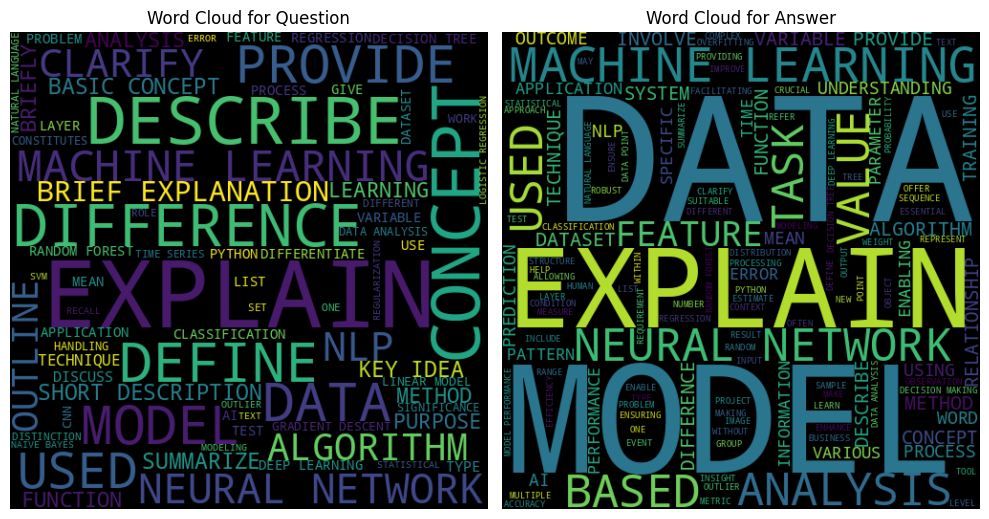

In [13]:
comment_words = ''
stopwords = set(STOPWORDS)

# Create subplots
fig, axs = plt.subplots(1, len(data.columns), figsize=(10, 6))

# Define the colormap
colormap = 'viridis'

# Iterate through the csv file
for i, col in enumerate(data.columns):
    # Concatenate all values in the column into a single string
    # and convert to lowercase
    comment_words += ' '.join(str(val).upper() for val in data[col]) + ' '

    # Generate WordCloud for the current column
    wordcloud = WordCloud(width=500, height=500,
                          stopwords=stopwords,
                          min_font_size=8,
                          colormap=colormap).generate(comment_words)

    # Plot the WordCloud image
    axs[i].imshow(wordcloud, interpolation='bilinear')
    axs[i].axis("off")
    axs[i].set_title(f"Word Cloud for {col}")

plt.tight_layout()
plt.show()

# Defining Functions

This Python code defines two functions:

**generate_DS_answers:** This function generates answers to a given prompt related to Data Science. It first constructs a prompt template using a provided context. Then, it creates a message containing the prompt using the tokenizer's apply_chat_template method. Next, it encodes the prompt into tokens, sends it to the GPU for processing, generates a response using the model, and decodes the output tokens into text. Finally, it returns the generated response.

**extract_content:** This function extracts the content from a given text that comes after the marker model. It searches for this marker in the text and returns the content that follows it. If the marker is not found, it returns a message indicating that the content was not found.

These functions work together to generate responses to prompts related to Data Science and extract the relevant content from generated text.

In [16]:
max_new_tokens=300

def generate_DS_answers(context):
    prompt_template=f"""Provide the Answer for the following Question in 300 words.
    Provide only useful information:
    Context:{context}

    Output: """

    messages=[
        {"role": "user","content": prompt_template},
        ]
    prompt= tokenizer.apply_chat_template(messages,tokenize=False,add_generation_prompt=True)
    input_ids=tokenizer.encode(prompt,add_special_tokens=True,return_tensors='pt').to("cuda")

    # 100 tokens = 75 words
    outputs=model.generate(input_ids,max_new_tokens=500)

    response=tokenizer.decode(outputs[0])

    return response

def extract_content(text):
    index=text.find('<start_of_turn>model')

    if index!=-1:
        content_after_model=text[index+len('<start_of_turn>model'):].strip()
    else:
        return "Content not found after '<start_of_turn>model'"
    return content_after_model

In [17]:
context="Question: "+dataset['Question'][0]
print(context)

Question: What is under-fitting and overfitting in machine learning?


In [18]:
Answers=generate_DS_answers(context)
print(Answers)

<bos><bos><start_of_turn>user
Provide the Answer for the following Question in 300 words.
    Provide only useful information:
    Context:Question: What is under-fitting and overfitting in machine learning?
    
    Output:<end_of_turn>
<start_of_turn>model
Sure, here's a summary of the key points about underfitting and overfitting in machine learning:

**Underfitting:**

* Underfitting occurs when a model is too specific to the training data and fails to generalize well to new, unseen data.
* It results in a model that performs poorly on tasks that are similar to the training data but not as complex.
* Underfitting can be caused by factors such as insufficient training data, poor model initialization, or choosing an inappropriate learning rate.

**Overfitting:**

* Overfitting occurs when a model becomes too closely fit to the training data and starts making predictions that are too similar to the training data itself.
* This can lead to poor generalization performance, where the mod

In [19]:
Answers=extract_content(Answers)
md(Answers)

Sure, here's a summary of the key points about underfitting and overfitting in machine learning:

**Underfitting:**

* Underfitting occurs when a model is too specific to the training data and fails to generalize well to new, unseen data.
* It results in a model that performs poorly on tasks that are similar to the training data but not as complex.
* Underfitting can be caused by factors such as insufficient training data, poor model initialization, or choosing an inappropriate learning rate.

**Overfitting:**

* Overfitting occurs when a model becomes too closely fit to the training data and starts making predictions that are too similar to the training data itself.
* This can lead to poor generalization performance, where the model performs poorly on new data.
* Overfitting can be caused by factors such as too many training parameters, insufficient training data, or using a learning rate that is too high.

In summary, underfitting occurs when a model is too specific to the training data, while overfitting occurs when a model becomes too similar to the training data.<eos>